In [13]:
import numpy as np
from matplotlib import pyplot as plt

from SurfaceTopography.Generation import fourier_synthesis

## Two equivalent ways to create a self-affine PSD.

In [14]:
c0 = 1e-28

L = 5e-6
n = 256

short_cutoff = 4 * L / n
long_cutoff = 1e-6

qr = 2 * np.pi / long_cutoff
qs =  2 * np.pi / short_cutoff

H = 0.8

def psd(q):
    psd = np.zeros_like(q)
    psd[q < qr] = c0 * qr **(- 2 -2 * H)
    mask = np.logical_and(q > qr, q <= qs)
    psd[mask] = c0 * q[mask] **(- 2 -2 * H)
    return psd

np.random.seed(0)
topo_psd = fourier_synthesis(
    nb_grid_pts=(n,n),
    physical_sizes=(L, L),
    psd=psd,
    )

np.random.seed(0)
topo_c0 = fourier_synthesis(
    nb_grid_pts=(n,n),
    physical_sizes=(L, L),
    c0=c0,
    long_cutoff=long_cutoff,
    short_cutoff=short_cutoff,
    hurst=H
    )

(1e-62, 3.405073059599927e-51)

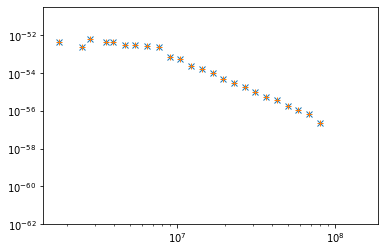

In [15]:
fig, ax = plt.subplots()

ax.loglog(*topo_c0.power_spectrum_from_area(), "x")
ax.loglog(*topo_psd.power_spectrum_from_area(), "+")
ax.set_ylim(bottom=1e-62)

In [18]:
topo_c0.rms_height_from_area()

1.601219761283726e-20

In [19]:
topo_psd.rms_height_from_area()

1.601219761283726e-20